In [1]:
# Imports
import pandas as pd
import sklearn
import sklearn.model_selection
import os
import numpy as np

In [2]:
# book crossing dataset
books = pd.read_csv(os.path.join("data", "book-crossing", "books.csv"), sep = ";", error_bad_lines = False, encoding = "latin-1")
books.drop(["Publisher", "Image-URL-S", "Image-URL-M", "Image-URL-L"], axis = 1)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
c:\users\juand\appdata\local\programs\python\python36\lib\site-packages\IP

,ISBN,Book-Title,Book-Author,Year-Of-Publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988
271356,0525447644,From One to One Hundred,Teri Sloat,1991
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004
271358,0192126040,Republic (World's Classics),Plato,1996


In [3]:
# book crossing dataset
ratings = pd.read_csv(os.path.join("data", "book-crossing", "ratings.csv"), sep = ";",encoding = "latin-1")
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [4]:
# book crossing dataset
users = pd.read_csv(os.path.join("data", "book-crossing", "users.csv"), sep = ";",encoding = "latin-1")
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [5]:
# goodbooks dataset
books = pd.read_csv(os.path.join("data", "goodbooks", "books.csv"))
books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [6]:
# goodbooks dataset
ratings = pd.read_csv(os.path.join("data", "goodbooks", "ratings.csv"))
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [7]:
# goodbooks dataset
to_read = pd.read_csv(os.path.join("data", "goodbooks", "to_read.csv"))
to_read

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380
...,...,...
912700,39374,1049
912701,10492,5180
912702,21879,4827
912703,21879,6642


In [8]:
# We are going to use the goodbooks dataset because it has more ratings
# Goal: given a user and a book -> predict the user's rating of that book.

In [9]:
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [10]:
# Encode the users
userEncoder = sklearn.preprocessing.LabelEncoder()
ratings['user_id'] = userEncoder.fit_transform(ratings['user_id'].values)
# Encode the books
bookEncoder = sklearn.preprocessing.LabelEncoder()
ratings['book_id'] = bookEncoder.fit_transform(ratings['book_id'].values)
# Convert ratings to float
ratings['rating'] = ratings['rating'].values.astype(np.float32)

In [11]:
# Exploring how much data we have
userSize = ratings['user_id'].nunique()
bookSize = ratings['book_id'].nunique()
minRating = min(ratings['rating'])
maxRating = max(ratings['rating'])

print(("Number of unique users: {}\n" +
      "Number of unique books: {}\n" +
      "Minimum rating: {}\n" +
      "Maximum rating: {}\n").format(userSize, bookSize, minRating, maxRating))


Number of unique users: 53424
Number of unique books: 10000
Minimum rating: 1.0
Maximum rating: 5.0



In [12]:
# Split into features and labels
features = ratings[['user_id', 'book_id']].values
labels = ratings['rating'].values

In [13]:
# Split into train and test
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(features, labels, 
                                                                            test_size = 0.10, 
                                                                            random_state = 420) 

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5378831, 2)
(597648, 2)
(5378831,)
(597648,)


In [15]:
print(x_train)
print(y_train)

[[ 5947    16]
 [ 7288   522]
 [24223  1773]
 ...
 [24215    93]
 [40225    85]
 [ 4852   225]]
[4. 4. 4. ... 3. 3. 4.]


In [16]:
# Size of the output of the embedding layer
outputSize = 100

In [17]:
# Reshape data to fit the network
x_train = [x_train[:,0],x_train[:,1]]
x_test = [x_test[:,0],x_test[:,1]]

In [18]:
x_train

[array([ 5947,  7288, 24223, ..., 24215, 40225,  4852], dtype=int64),
 array([  16,  522, 1773, ...,   93,   85,  225], dtype=int64)]

In [19]:
# Keras imports
from tensorflow import keras
from keras.layers.embeddings import Embedding
from keras.layers import Input, Reshape, Concatenate, Dropout, Dense, Lambda, Reshape
from keras.optimizers import Adam
from keras.models import Model

In [20]:
# Input Layers

userInput = Input(shape=(1,))
userEmbedding = Embedding(userSize, outputSize) (userInput)
userEmbedding = Reshape((outputSize,)) (userEmbedding)

bookInput = Input(shape=(1,))
bookEmbedding = Embedding(bookSize, outputSize) (bookInput)
bookEmbedding = Reshape((outputSize,)) (bookEmbedding)

In [21]:
# Output Layers

concatLayer = Concatenate() ([userEmbedding, bookEmbedding])

dropoutLayer1 = Dropout(0.5) (concatLayer)

denseLayer1 = Dense(50, activation = 'relu') (dropoutLayer1)

dropoutLayer2 = Dropout(0.5) (denseLayer1)

denseLayer2 = Dense(10, activation = 'relu') (dropoutLayer2)

dropoutLayer3 = Dropout(0.5) (denseLayer2)

outputLayer = Dense(1, activation = 'sigmoid') (dropoutLayer2)

adjOutput = Lambda(lambda rating : rating * (5 - 1) + 1) (outputLayer)


In [22]:
# Define the model

model = Model (inputs = [userInput, bookInput], outputs = adjOutput)
opt = Adam (lr=0.001)
model.compile(loss='mean_squared_error', optimizer = opt, metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       5342400     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       1000000     input_2[0][0]                    
______________________________________________________________________________________________

In [27]:
# Train the model

history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, verbose = 1,
                    validation_data = (x_test, y_test))

c:\users\juand\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5378831 samples, validate on 597648 samples
Epoch 1/5
5378831/5378831 [==============================] - 403s 75us/step - loss: 0.7786 - accuracy: 0.4375 - val_loss: 0.7352 - val_accuracy: 0.4683
Epoch 2/5
5378831/5378831 [==============================] - 400s 74us/step - loss: 0.7393 - accuracy: 0.4590 - val_loss: 0.7263 - val_accuracy: 0.4720
Epoch 3/5
5378831/5378831 [==============================] - 398s 74us/step - loss: 0.7310 - accuracy: 0.4646 - val_loss: 0.7217 - val_accuracy: 0.4664
Epoch 4/5
5378831/5378831 [==============================] - 400s 74us/step - loss: 0.7261 - accuracy: 0.4674 - val_loss: 0.7218 - val_accuracy: 0.4816
Epoch 5/5
5378831/5378831 [==============================] - 402s 75us/step - loss: 0.7218 - accuracy: 0.4698 - val_loss: 0.7176 - val_accuracy: 0.4715


In [28]:
# Save the trained model
model.save(os.path.join("models", "model_2"))

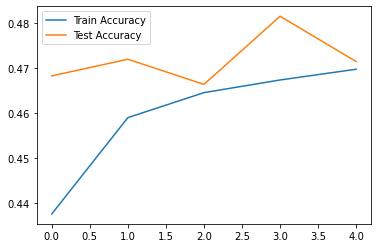

In [29]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label = "Train Accuracy")
plt.plot(val_accuracy, label = "Test Accuracy")
plt.legend()
plt.show()

In [44]:
# Making recommendations for user 0
def recommend (userId, model):
    model = keras.models.load_model(os.path.join("models", model))
    encodedUser = userEncoder.transform([userId])[0]
    allBooks = np.array(list(set(ratings["book_id"].values)))
    user = np.array([encodedUser]*len(allBooks))
    predictions = model.predict([user, allBooks])
    predictions = np.array([p[0] for p in predictions])
    print(predictions)
recommend (1, "model_2")

[3.976553  4.0753284 2.4538972 ... 4.090063  3.5498266 3.7619078]


In [39]:
model = keras.models.load_model(os.path.join("models", "model_2"))

In [48]:
user_id = 3265
encodedUser = userEncoder.transform([user_id])[0]
print(encodedUser)
allBooks = np.array(list(set(ratings["book_id"].values)))
user = np.array([encodedUser]*len(allBooks))
predictions = model.predict([user, allBooks])
print(predictions)
predictions = np.array([p[0] for p in predictions])
top5ratings = (-predictions).argsort()[:10]
top5books = allBooks[top5ratings]
top5booksDecoded = bookEncoder.inverse_transform(top5books)
print(predictions[top5ratings])

3264
[[4.583592 ]
 [4.609994 ]
 [3.7155447]
 ...
 [4.6032624]
 [4.1238995]
 [4.3241324]]
[4.942001  4.936038  4.911011  4.908046  4.900565  4.8914604 4.8807087
 4.877818  4.8749804 4.874181 ]


In [44]:
for book_id in top5booksDecoded:
    print(books[books.book_id == book_id]["original_title"].values)
    

['The Complete Calvin and Hobbes']
[nan]
['Attack of the Deranged Mutant Killer Monster Snow Goons: A Calvin and Hobbes Collection']
['دیوان\u200e\u200e [Dīvān]']
['The Indispensable Calvin and Hobbes: A Calvin and Hobbes Treasury']
['The Authoritative Calvin and Hobbes']
['Jesus the Christ: A Study of the Messiah and His Mission according to Holy Scriptures both Ancient and Modern']
['Holy Bible English Standard Version']
['The Way of Kings, Part 1']
['The Days Are Just Packed: A Calvin and Hobbes Collection']


In [42]:
read = ratings[ratings.user_id==user_id][["book_id","rating"]].values
for book_id,rating in read:
    print(books[books.book_id == book_id]["original_title"].values,rating)

['A Wrinkle in Time'] 5.0
['Rebecca'] 4.0
['Blameless'] 3.0
['Nevermore'] 5.0
['Jane Eyre'] 2.0
[nan] 5.0
['Bergdorf Blondes'] 4.0
['The New York Trilogy'] 3.0
['The 19th Wife'] 5.0
['Red Seas Under Red Skies'] 4.0
['Harry Potter and the Half-Blood Prince'] 3.0
['The One and Only Ivan'] 4.0
['El amor en los tiempos del cólera'] 5.0
['Will Grayson, Will Grayson'] 4.0
['A Farewell to Arms'] 5.0
['When the Bough Breaks'] 4.0
['Broken Monsters'] 5.0
['Sorgenfri'] 4.0
['Nine Dragons'] 2.0
['Wicked: The Grimmerie, a Behind-the-Scenes Look at the Hit Broadway Musical'] 2.0
['Gulliver’s Travels'] 2.0
['Πολιτεία'] 2.0
['Sweet Filthy Boy '] 1.0
['The Elements of Style'] 5.0
['The Sisterhood of the Traveling Pants'] 3.0
['Drive: The Surprising Truth About What Motivates Us'] 1.0
['The Ghost Road'] 3.0
['Warm Bodies'] 2.0
['The Long Goodbye'] 2.0
['Flowers for Algernon'] 2.0
['Back Roads'] 3.0
['Still Missing'] 4.0
['Grip of the Shadow Plague'] 2.0
['A Walk to Remember'] 2.0
['Ten Apples Up on Top

array([9], dtype=int64)